**TUGAS UAS - ANALISIS DATA CIRI-CIRI HEWAN MENGGUNAKAN TEKNIK CLUSTERING K-MEANS**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Animal Dataset.csv to Animal Dataset.csv


**ANALISA DATASET**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Animal                   205 non-null    object
 1   Height (cm)              205 non-null    object
 2   Weight (kg)              205 non-null    object
 3   Color                    205 non-null    object
 4   Lifespan (years)         205 non-null    object
 5   Diet                     205 non-null    object
 6   Habitat                  205 non-null    object
 7   Predators                205 non-null    object
 8   Average Speed (km/h)     205 non-null    object
 9   Countries Found          205 non-null    object
 10  Conservation Status      205 non-null    object
 11  Family                   205 non-null    object
 12  Gestation Period (days)  205 non-null    object
 13  Top Speed (km/h)         205 non-null    object
 14  Social Structure         205 non-null    o

<Axes: title={'center': 'Distribusi Pola Makan Hewan'}, xlabel='Diet'>

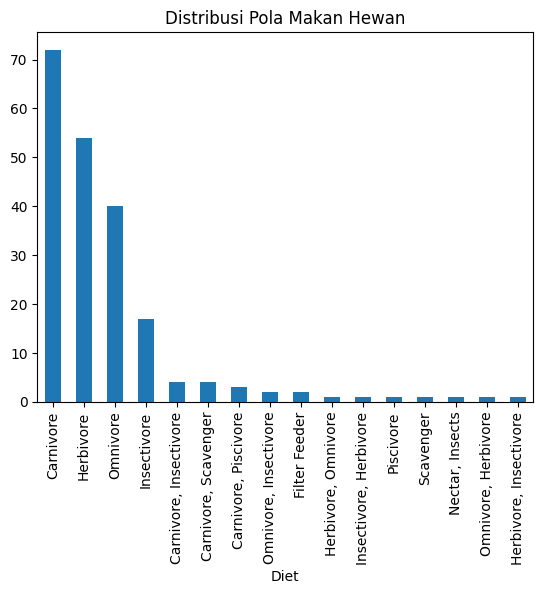

In [ ]:
import pandas as pd

df = pd.read_csv('Animal Dataset.csv')
df.info()
df.describe()
df['Diet'].value_counts().plot(kind='bar', title='Distribusi Pola Makan Hewan')

**PENGUJIAN MODEL**

In [ ]:
df['Height (cm)'] = df['Height (cm)'].apply(clean_numeric)
df['Weight (kg)'] = df['Weight (kg)'].apply(clean_numeric)
df['Average Speed (km/h)'] = df['Average Speed (km/h)'].apply(clean_numeric)
df = df.dropna(subset=['Height (cm)', 'Weight (kg)', 'Average Speed (km/h)'])

X = df[['Height (cm)', 'Weight (kg)', 'Average Speed (km/h)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df[['Animal', 'Cluster']].head(10)
df['Cluster'].unique()

array([0, 1, 3, 4, 2], dtype=int32)

**VISUALISASI**

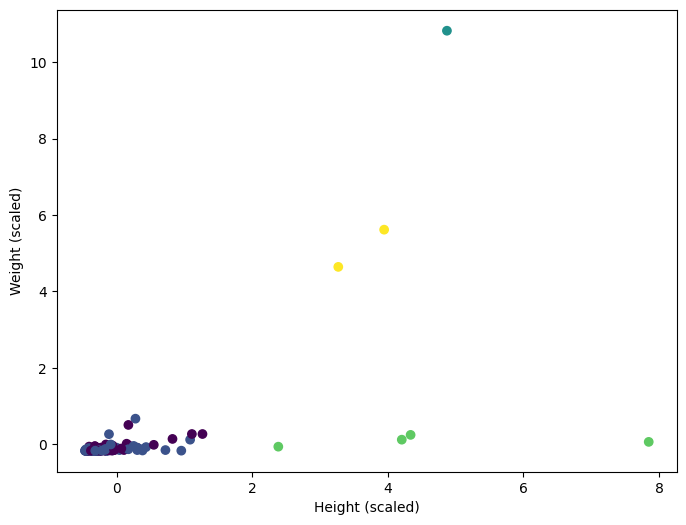

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Height (scaled)')
plt.ylabel('Weight (scaled)')
plt.show()

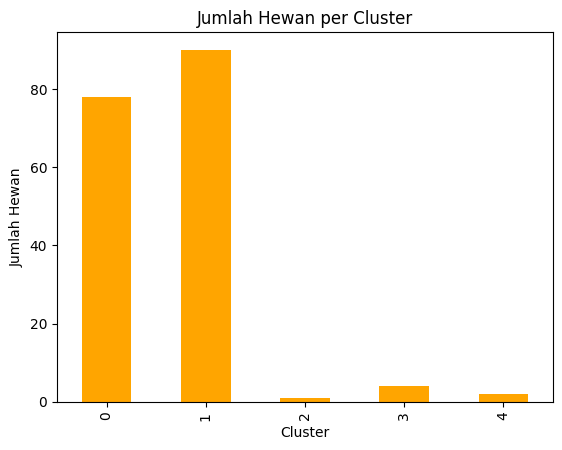

In [ ]:
df['Cluster'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Jumlah Hewan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Hewan')
plt.show()

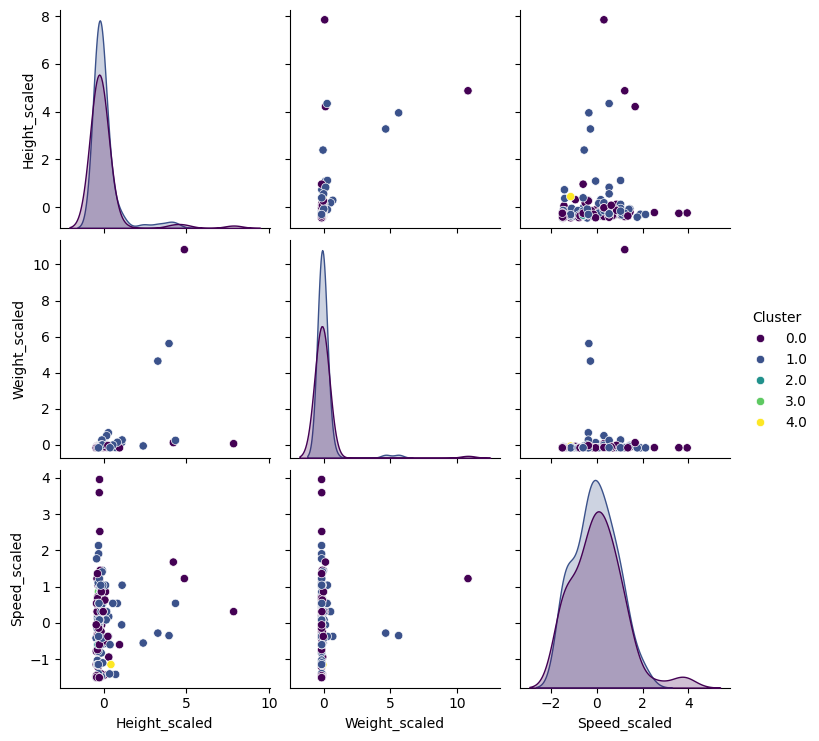

In [ ]:
import seaborn as sns

scaled_df = pd.DataFrame(X_scaled, columns=['Height_scaled', 'Weight_scaled', 'Speed_scaled'])
scaled_df['Cluster'] = df['Cluster']

sns.pairplot(scaled_df, hue='Cluster', palette='viridis')
plt.show()

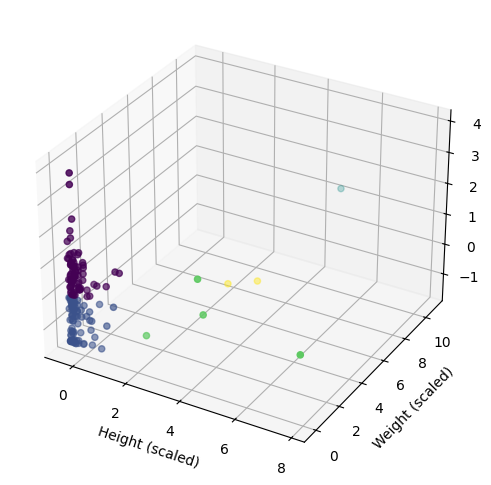

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Height (scaled)')
ax.set_ylabel('Weight (scaled)')
ax.set_zlabel('Speed (scaled)')

plt.show()